# Predicting Heart-Disease using MACHINE LEARNING*
> This project looks into use of various machine learning and data sc. libraries in an attempt to build a ml model capable of predicting whether a person has heart disease or not based on medical attributes.

1. problem definition
2. data we use
3. evaluation metric
4. features
5. modeling
6. experimentation

### 1. In a statement:
given clinical parameters about a patient, we classify whether the patient has heart disease or not.

### 2. data:
https://archive.ics.uci.edu/dataset/45/heart+disease  (also available on kaggle)

### 3. evaluation: 
if 95% accuracy can be reached then pursue further, else not.

### 4. features: 
given, information about various attributes in the dataset. Only fourteen attributes will be used.
1. id: patient identification number
2. ccf: social security number (I replaced this with a dummy value of 0)
3. age: age in years {USED}
4. sex: sex (1 = male; 0 = female) {USED}
5. painloc: chest pain location (1 = substernal; 0 = otherwise)
6. painexer (1 = provoked by exertion; 0 = otherwise)
7. relrest (1 = relieved after rest; 0 = otherwise)
8. pncaden (sum of 5, 6, and 7)
9. cp: chest pain type {USED}
  -- Value 1: typical angina
  -- Value 2: atypical angina
  -- Value 3: non-anginal pain
  -- Value 4: asymptomatic
10. trestbps: resting blood pressure (in mm Hg on admission to the hospital) {USED}
11. htn
12. chol: serum cholestoral in mg/dl {USED}
13. smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
14. cigs (cigarettes per day)
15. years (number of years as a smoker)
16. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) {USED}
17. dm (1 = history of diabetes; 0 = no such history)
18. famhist: family history of coronary artery disease (1 = yes; 0 = no)
19. restecg: resting electrocardiographic results {USED}
   -- Value 0: normal
   -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
20. ekgmo (month of exercise ECG reading)
21. ekgday(day of exercise ECG reading)
22. ekgyr (year of exercise ECG reading)
23. dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
24. prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
25. nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
26. pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
27. diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
28. proto: exercise protocol
   1 = Bruce     
   2 = Kottus
   3 = McHenry
   4 = fast Balke
   5 = Balke
   6 = Noughton 
   7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
   8 = bike 125 kpa min/min  
   9 = bike 100 kpa min/min
   10 = bike 75 kpa min/mim
   11 = bike 50 kpa min/min
   12 = arm ergometer
29. thaldur: duration of exercise test in minutes
30. thaltime: time when ST measure depression was noted
31. met: mets achieved
32. thalach: maximum heart rate achieved {USED}
33. thalrest: resting heart rate
34. tpeakbps: peak exercise blood pressure (first of 2 parts)
35. tpeakbpd: peak exercise blood pressure (second of 2 parts)
36. dummy
37. trestbpd: resting blood pressure
38. exang: exercise induced angina (1 = yes; 0 = no) {USED}
39. xhypo: (1 = yes; 0 = no)
40. oldpeak = ST depression induced by exercise relative to rest {USED}
41. slope: the slope of the peak exercise ST segment {USED}
   -- Value 1: upsloping
   -- Value 2: flat
   -- Value 3: downsloping
42. rldv5: height at rest
43. rldv5e: height at peak exercise
44. ca: number of major vessels (0-3) colored by flourosopy {USED}
45. restckm: irrelevant
46. exerckm: irrelevant
47. restef: rest raidonuclid (sp?) ejection fraction
48. restwm: rest wall (sp?) motion abnormality
   0 = none
   1 = mild or moderate
   2 = moderate or severe
   3 = akinesis or dyskmem (sp?)
49. exeref: exercise radinalid (sp?) ejection fraction
50. exerwm: exercise wall (sp?) motion 
51. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect {USED}
52. thalsev: not used
53. thalpul: not used
54. earlobe: not used
55. cmo: month of cardiac cath (sp?)  (perhaps "call")
56. cday: day of cardiac cath (sp?)
57. cyr: year of cardiac cath (sp?)
58. num: diagnosis of heart disease (angiographic disease status) {USED} {{ PREDICTION WILL BE BASED ON THIS }}
   -- Value 0: < 50% diameter narrowing
   -- Value 1: > 50% diameter narrowing
   (in any major vessel: attributes 59 through 68 are vessels)
59. lmt
60. ladprox
61. laddist
62. diag
63. cxmain
64. ramus
65. om1
66. om2
67. rcaprox
68. rcadist
69. lvx1: not used
70. lvx2: not used
71. lvx3: not used
72. lvx4: not used
73. lvf: not used
74. cathef: not used
75. junk: not used
76. name: last name of patient  (I replaced this with the dummy string "name")

### Preparing tools: using Pandas, Matplotlib, NumPy for Data Manipulation and Analysis:
we will import all the tools we need for the project

In [1]:
# Regular EDA (exploratory data analysis) and plotting/visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
# we want our plots to appear inside the notebook

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape
# (rows, cols)

(303, 14)

#### data exploration (exploratory data analysis)
1. understand data
2. try to solve the problem by data?
3. what is missing from data and how do you deal with it
4. what are outlier and how to deal with them
5. how can you transform features to get more out of the data

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# how many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

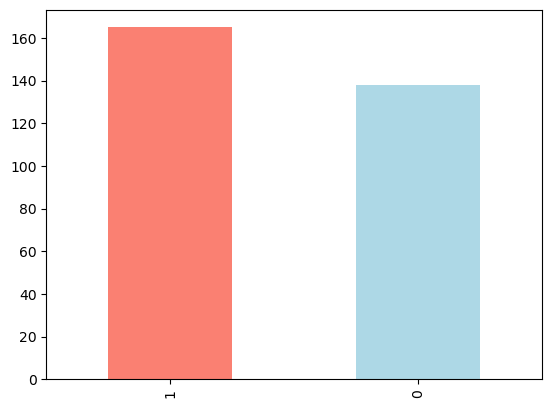

In [6]:
df.target.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart disease frequeny acc. to sex
note: comparing sex to target attribute

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


note: what we infer from the above is, considering our sample data roughly 75% women are likely having heart disease (i.e 72 out of 96 women) and 50% men are likely (i.e 93 out of 207 men).

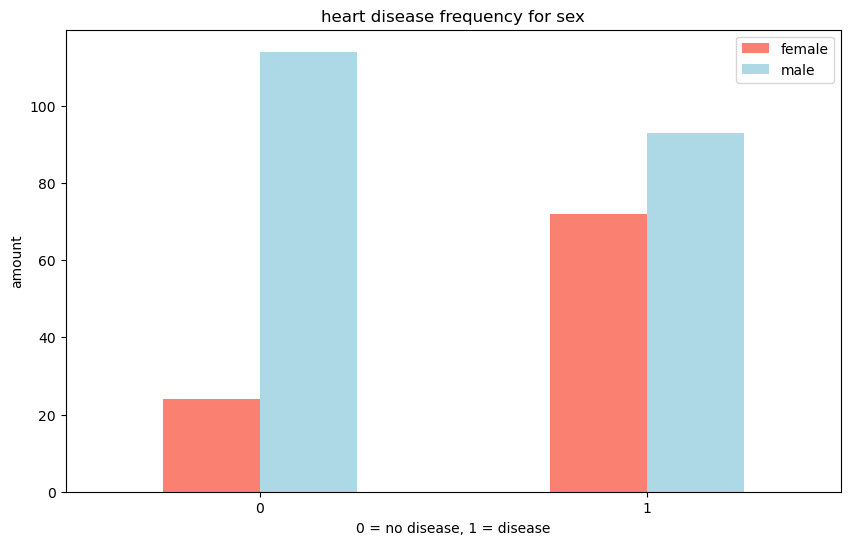

In [12]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10,6), color = ['salmon', 'lightblue'])
plt.title("heart disease frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("amount")
plt.legend(["female", "male"]);
plt.xticks(rotation = 0); # xticks is labels on x axis (i.e 0 and 1)

note: combining a couple of independant variables and then compare them to our target variable. 

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

#### age vs. max heart rate for heart-disease

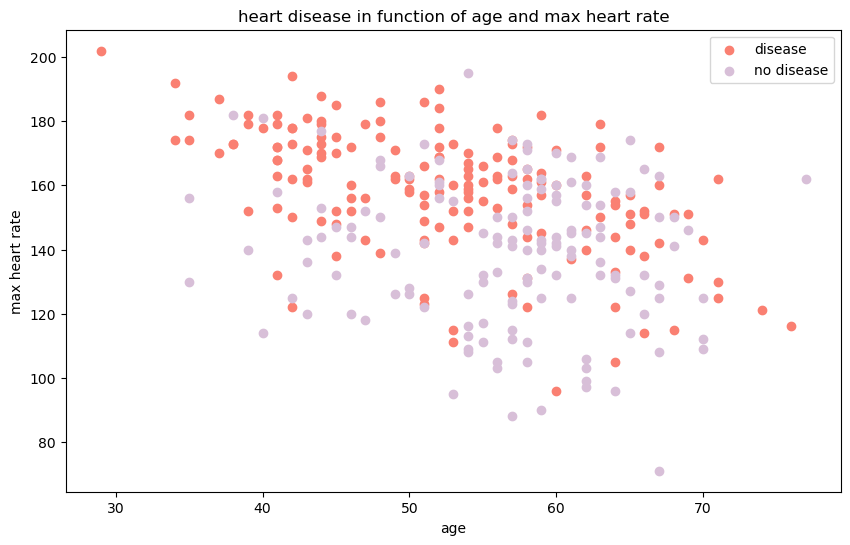

In [15]:
# create another figure
plt.figure(figsize = (10,6))

# scatter with positive examples
plt.scatter(df.age[df.target == 1], #this means we are taking the age col values where target equals 1
            df.thalach[df.target == 1],
            c = 'salmon')

# scatter with negative examples
plt.scatter(df.age[df.target == 0], #this means we are taking the age col values where target equals 0
            df.thalach[df.target == 0],
            c = 'thistle')
plt.title('heart disease in function of age and max heart rate')
plt.xlabel("age")
plt.ylabel('max heart rate')
plt.legend(['disease', 'no disease']);

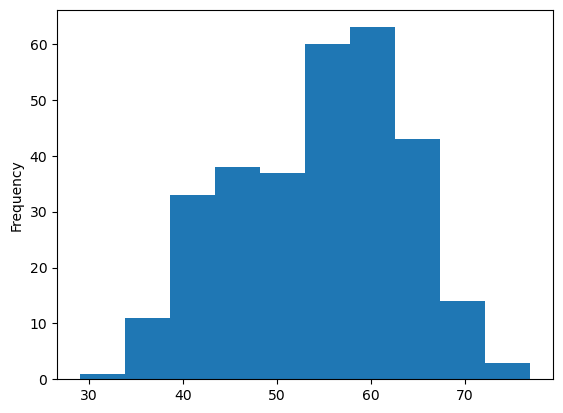

In [16]:
# check distribution of age with histogram (another word for spread of data)
df.age.plot.hist();

#### heart disease frequency per chest pain type
cp: chest pain type {USED} -- 
1. Value 1: typical angina : related to decreased heart supply of blood
2. Value 2: atypical angina : chest pain not related to heart
3. Value 3: non-anginal pain : esophageal spasm ( non-heart related )
4. Value 4: asymptomatic : chest pain with no signs of disease

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


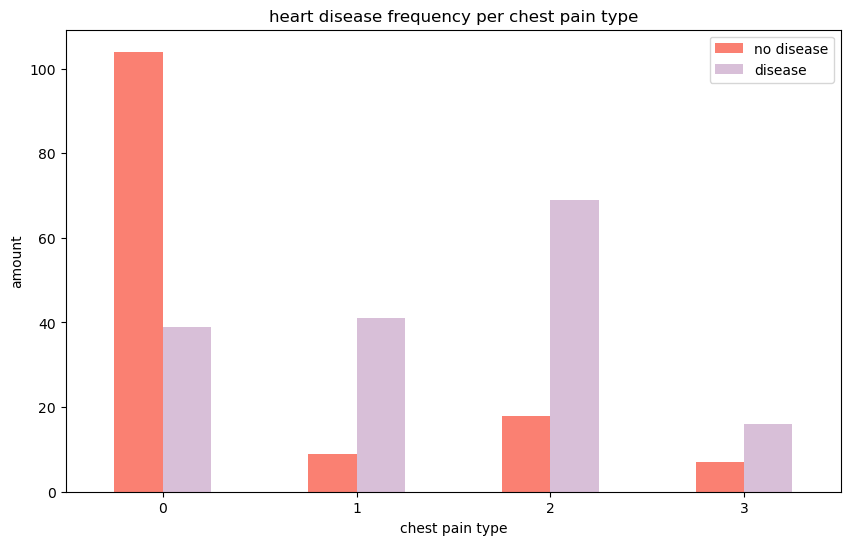

In [18]:
# visualize
pd.crosstab(df.cp, df.target).plot(kind = 'bar', 
                                  figsize = (10,6),
                                  color = ['salmon', 'thistle'])
plt.title('heart disease frequency per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('amount')
plt.legend(['no disease', 'disease'])
plt.xticks(rotation = 0); #makes it easier to read 

In [19]:
# check correlation b/w independant and dependant variables
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# make a correlation matrix : basically comparing each of these columns to each other
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

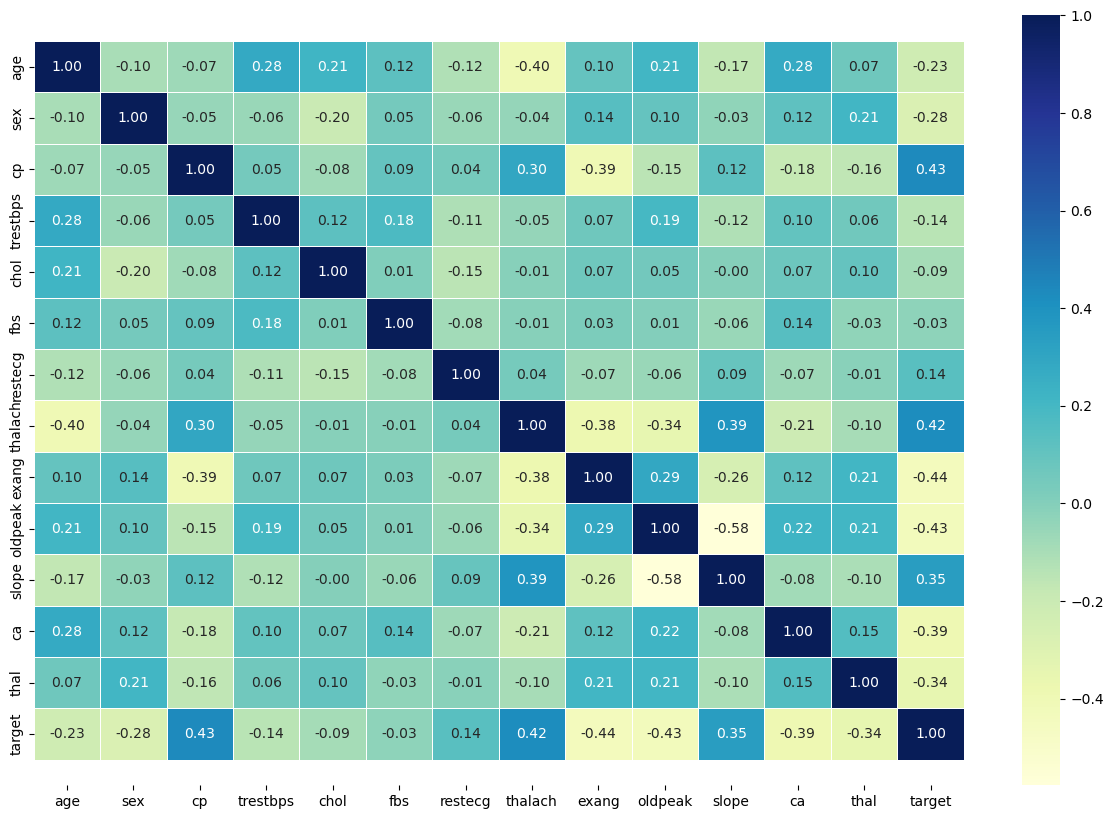

In [21]:
# making our correlation matrix nicer
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True, 
                linewidths = 0.5,
                fmt = ".2f", #format
                cmap = "YlGnBu" );
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

* negative correlation: when out of two variables, one variable's value inc and other's dec
* positive correlation: when both variable's values increases or decreases

Note : search for correlation matrix

A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

### 5. Modelling

In [22]:
# splitting data into labels and features (x and y)
X = df.drop("target", axis = 1)
y = df['target']

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# split data into train and test sets (80-20 ratio split)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

data split into training and test split, now building the model.
* find patterns on train set
* use patterns on test set

we are going to try 3 models:
* logistic regression
* k-nearest neighbour classifier
* random forest classifier

In [28]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
# create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the given machine learning models given in the dictionary.
    models : dict of sklearn ML models we will use
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # setting random seed
    np.random.seed(42)
    
    # making a dictionary to keep models scores
    model_scores = {}
    # loop through models
    
    for name, model in models.items(): # name is the key and model is value
        # fit the model to data
        model.fit(X_train, y_train)
        
        # evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\Soumya\Desktop\sample1\project-heartdisease\envir\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model Comparison

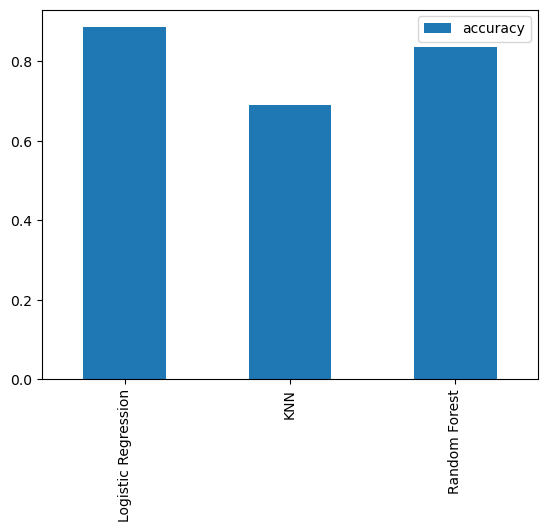

In [30]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar(); # 'T' here transposes the data frame

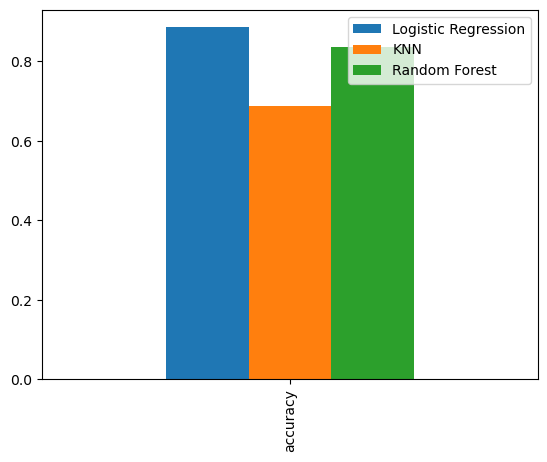

In [31]:
model_compare.plot.bar();

now we've got a baseline model, a model's first prediction aren't always what we should expect our next steps off

* hyperparameter tuning : basically tuning settings acc to get different results
* feature importance
* confusion matrix
* cross validation
* precision
* recall
* f1-score
* classification report
* ROC curve
* area under the curve (AUC)

### Hyperparameter Tuning

In [32]:
# Let's tune K-nearest neighbours
train_scores = []
test_scores = []

# create a list of different values for n_neighbours
neighbors = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #fit the algorithm
    knn.fit(X_train, y_train)
    
    #update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #update the testing scores list
    test_scores.append(knn.score(X_test, y_test))

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


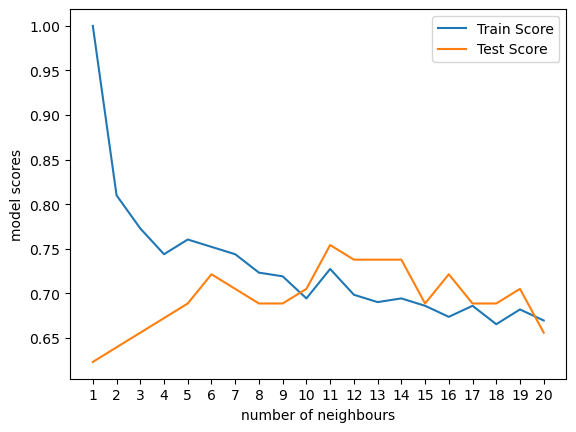

In [35]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xticks(np.arange(1, 21, 1)) # this will bring out a list of range 1-21 with space of 1
plt.xlabel("number of neighbours")
plt.ylabel("model scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

 Just by tuning a little we were able to improve our result. (n_neighbors default is 5 but here 11 gives the best result).
 It still does not reach the other models result. Experimenting manually is a tedious task, so we will use RandomizedSearchCV()
 
 #### Hyperparamete Tuning using RandomizedSearchCV():
 
 * tuning RandomForestClassifier()
 * tuning LogisticRegression()

In [36]:
# create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [37]:
# np.logspace(-4, 4, 20), np.arange(10, 1000, 50)

now hyperparameter grid setup for each model now tuning using RandomizedSearchCV

In [38]:
# tune LogisticRegression
np.random.seed(42)
# setup random hyperparameter search for logistic regression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5, 
                               n_iter = 20,
                               verbose = True) #rs for randomizedsearch and log reg for logistic regression
# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [41]:
# setup random seed
np.random.seed(42)
# setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)
#fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
# find best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
# evaluate the randomized search RandomForestClassifier model 
rs_rf.score(X_test, y_test)

0.8688524590163934

In [44]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Hyperparameter tuning using GridSearchCV
since, LogisticRegression provides best scores so far, will try and improve further using GridSearchCV

In [45]:
# different parameters for LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

#setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid, #in gridsearch known as param_grid and in randomizedsearch known as param_distribution
                          cv = 5,
                          verbose = True) #in this search no n_iter because all possible combos tried 
# fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [46]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
#evaluate grid search for logisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

note: we get the same results even after hyperparameter tuning. now remember the default score for classifier is accuracy

### Evaluating tuned ml model beyond accuracy (specific to classifier)
* ROC and AUC curve
* Confusion Matrix
* Classfication Report
* Precision
* Recall
* F-1 Score
>to make comparisons and evaluate model, first predictions should be made

>and if cv was used wherever possible, would be even better.

In [48]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [49]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

note: ROC curve : A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the performance of a binary classifier model at varying threshold values. The ROC curve is the plot of the true positive rate against the false positive rate at each threshold setting.

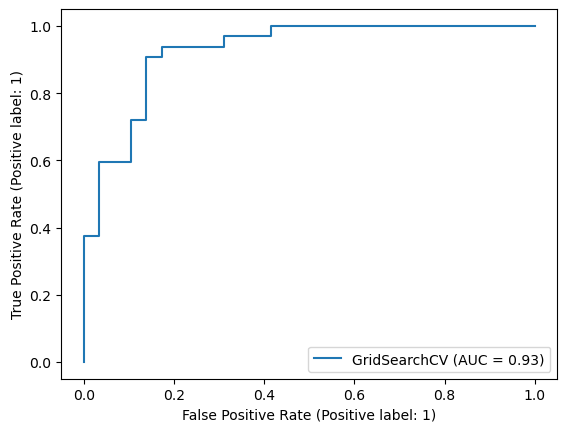

In [51]:
# import ROC curve function from sklearn.metrics module but we have done so already.SO plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test);

In [52]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [53]:
sns.set(font_scale = 1.5)

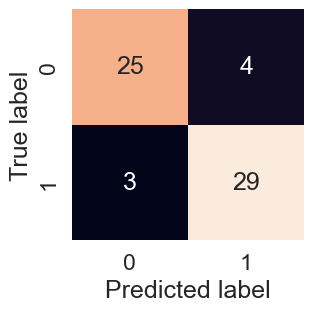

In [54]:
# importing seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
        
plot_conf_mat(y_test, y_preds)

> Done with ROC Curve, AUC metric and confusion matrix. Moving onto a classification report as well as cross val precision, recall and f1-score

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross-validation:
calculation of precision, recall, f1-score of our model using cross validation and to do so we use 'cross_val_score()'

In [56]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [59]:
#create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                          solver = 'liblinear')

In [67]:
#cross-val accuracy
cv_acc = cross_val_score(clf, 
                         X,
                         y,
                         cv = 5,
                         scoring = 'accuracy')
cv_acc = np.mean(cv_acc)

In [69]:
# np.mean(cv_acc)

In [63]:
#cross-val precision
cv_prec = cross_val_score(clf, 
                         X,
                         y,
                         cv = 5,
                         scoring = 'precision')
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [64]:
#cross-val-recall
cv_recall = cross_val_score(clf, 
                         X,
                         y,
                         cv = 5,
                         scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [65]:
#cross-val-f1-score
cv_f1 = cross_val_score(clf, 
                         X,
                         y,
                         cv = 5,
                         scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

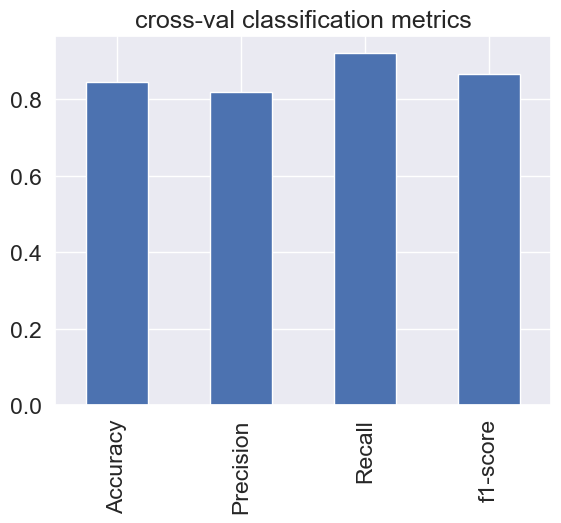

In [68]:
#visualize cross-val metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_prec,
                           'Recall': cv_recall,
                           'f1-score': cv_f1}, index = [0])
cv_metrics.T.plot.bar(title = 'cross-val classification metrics',
                      legend = False);

### Feature Importance 
another way of asking, "which features contributed most to the outcomes of the model and how did they do it?"

This process is different for each model. How to do this is search for '(MODEL NAME) feature importance'

In [72]:
#df.head()

In [75]:
#gs_log_reg.best_params_

In [76]:
#fit and instance of LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')
clf.fit(X_train, y_train);

In [77]:
#check coef_ ((stands for coefficient))
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [78]:
#match coeffiencts of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

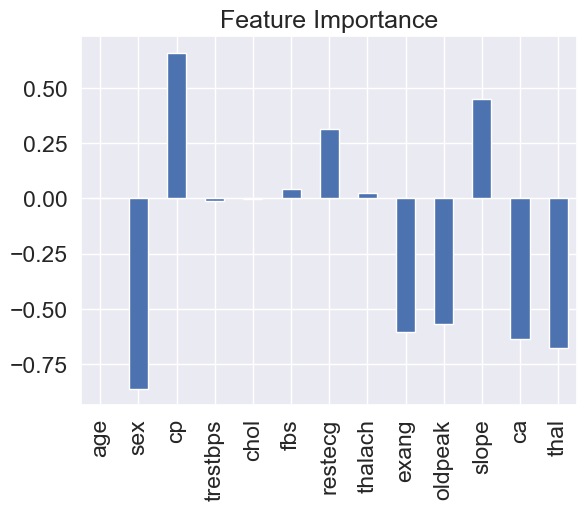

In [80]:
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend =False);

In [81]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [83]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### Experimentation
we have been trying different processes and metrics, explored dataset given.
Research and research.
* can we collect more data/samples?
* could there be a better model we can try?  (eg. CatBoost, or XGBoost)
* can we improve the models used in our project further?
* how can we export and share the model with another person?
....